In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from pyvi.ViTokenizer import tokenize
from underthesea import word_tokenize
%matplotlib inline

In [192]:
%%time
data_train = []
with open('train.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        tmp = line.strip().split()
        data_train.append((tmp[0], ' '.join(tmp[1:])))
df_train = pd.DataFrame(data_train, columns=['label', 'title'])

data_test = []
with open('test.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        tmp = line.strip().split()
        data_test.append((tmp[0], ' '.join(tmp[1:])))
df_test = pd.DataFrame(data_test, columns=['label', 'title'])

Wall time: 225 ms


In [193]:
df_train.duplicated().sum()

13

In [194]:
def preprocessing(title):
    special_char = '[^\sabcdefghijklmnopqrstuvwxyzàáâãèéêìíòóôõùúýăđĩũơưạảấầẩẫậắằẳẵặẹẻẽếềểễệỉịọỏốồổỗộớờởỡợụủứừửữựỳỵỷỹ_]'
    title = re.sub(special_char, '', title)
    result = []
    for w in word_tokenize(title, format='text').split():
        if re.search('[^bcdđfghjklmnpqrstvwx]', w) and len(w)>=2:
            result.append(w)
    return ' '.join(result)

In [195]:
df_train['processed'] = df_train.title.apply(lambda x: preprocessing(x))
df_train_preprocessed = df_train[['label', 'processed']].drop_duplicates()
df_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87502 entries, 0 to 91867
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      87502 non-null  object
 1   processed  87502 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [196]:
df_train_preprocessed.processed = df_train_preprocessed.processed.apply(lambda x: x.replace('_', ''))

In [197]:
df_train_preprocessed.duplicated().sum()

8

In [198]:
df_train_preprocessed[df_train_preprocessed.duplicated()]

label           processed
7044   __label__12.0   áo sơmi interight
9887   __label__12.0        áo sơmi caro
18469  __label__14.0  decal dán lalashop
50384  __label__12.0          áo sơmi nơ
56701  __label__12.0      áo sơmi bamboo
63628  __label__12.0             áo sơmi
64937   __label__1.0    dâycáp sạc apple
83088   __label__1.0       xe ôtô goolrc

In [199]:
df_train_preprocessed[df_train_preprocessed.processed=='đèn pin']

label processed
7534    __label__1.0   đèn pin
25489  __label__14.0   đèn pin
86483  __label__16.0   đèn pin

In [200]:
def drop_dup_and_rm_multi_label_title(df):
    df.drop_duplicates(inplace=True)
    counter = df.processed.value_counts()
    multi_label_title = counter[counter>1].index.to_list()
    df.processed = df.processed.apply(lambda x: None if x in multi_label_title else x)
    df.dropna(inplace=True)
    return df

In [201]:
drop_dup_and_rm_multi_label_title(df_train_preprocessed)

label            processed
0       __label__1.0          chuột texet
1       __label__1.0        tai nghe sony
2       __label__1.0      bànủi bluestone
3       __label__1.0  tai nghe sennheiser
4       __label__1.0  đế tản nhiệt cooler
...              ...                  ...
91863  __label__11.0         băng chămsóc
91864   __label__1.0  kính xiaomi nillkin
91865  __label__12.0         dep nam asia
91866  __label__12.0     túi đeo nam đựng
91867  __label__12.0           ví da wmen

[85583 rows x 2 columns]

In [202]:
df_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85583 entries, 0 to 91867
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      85583 non-null  object
 1   processed  85583 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [203]:
labels = df_train_preprocessed.label.unique()

In [204]:
lb_count_train = df_train_preprocessed.label.value_counts()
# lb_count_test = df_test_preprocessed.label.value_counts()
print('Tỉ lệ các nhãn trong tập train, test : ')
for lb in labels:
    print(f'{lb[7:]:^7}', end=' : ')
print('\b\b\n')

for lb in labels:
    print(f'{round(lb_count_train[lb]/lb_count_train[-1]):^7d}', end=' : ')
print('\b\b\n')

# for lb in labels:
#     print(f'{round(lb_count_test[lb]/lb_count_test[-1]):12d}', end=' : ')
# print('\b\b')

Tỉ lệ các nhãn trong tập train, test : 
 __1.0  : __14.0  : __11.0  : __24.0  : __12.0  : __16.0  :  __9.0  : 

  11    :   14    :    9    :    4    :   13    :    1    :    3    : 



([<matplotlib.patches.Wedge at 0x1d45dc2e5c8>,
 [Text(0.7595867003697264, 0.7956305955790235, '__label__14.0'),
  Text(-0.7854810875253477, 0.7700775682617935, '__label__12.0'),
  Text(-0.9099650149505772, -0.6180320959027905, '__label__1.0'),
  Text(0.16710473510820642, -1.0872331891109728, '__label__11.0'),
  Text(0.8436976107598237, -0.7058146651906329, '__label__24.0'),
  Text(1.0523808882580326, -0.32014756914465964, '__label__9.0'),
  Text(1.0982723579714515, -0.06162651795962645, '__label__16.0')],
 [Text(0.41432001838348714, 0.4339803248612855, '25.7%'),
  Text(-0.4284442295592805, 0.42004230996097824, '23.8%'),
  Text(-0.49634455360940566, -0.3371084159469766, '19.8%'),
  Text(0.09114803733174895, -0.5930362849696215, '16.0%'),
  Text(0.4601986967780856, -0.3849898173767088, '6.9%'),
  Text(0.5740259390498359, -0.17462594680617796, '5.8%'),
  Text(0.5990576498026099, -0.03361446434161443, '1.8%')])

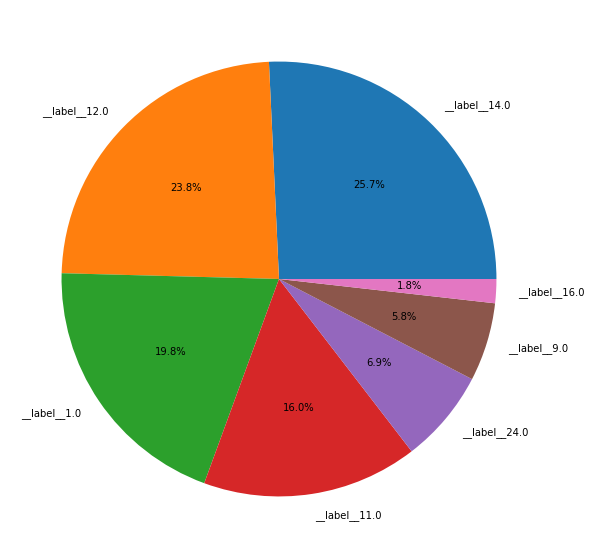

In [205]:
plt.figure(figsize=(10,10))
plt.pie(lb_count_train, labels=lb_count_train.index, autopct='%1.1f%%')

In [206]:
df_train_preprocessed['len'] = df_train_preprocessed.processed.apply(lambda x: len(x.split()))
df_train_preprocessed.len.value_counts()

3     32268
2     24063
4     18592
5      7036
6      2236
7       652
1       498
8       177
9        38
10       14
11        7
12        1
14        1
Name: len, dtype: int64

In [207]:
df_train_preprocessed.processed[df_train_preprocessed.len==1].to_csv('len_1.csv')

In [208]:
df_train_preprocessed.label[df_train_preprocessed.len==1].value_counts()

__label__14.0    189
__label__1.0     124
__label__11.0     55
__label__12.0     49
__label__9.0      41
__label__24.0     33
__label__16.0      7
Name: label, dtype: int64

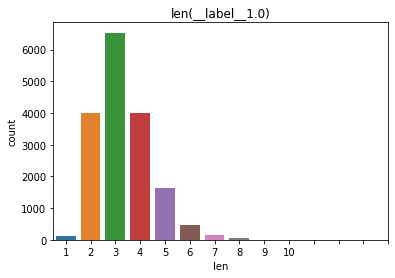

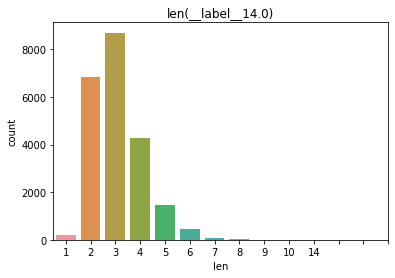

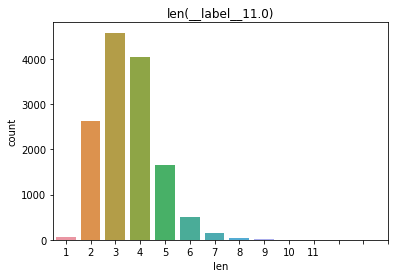

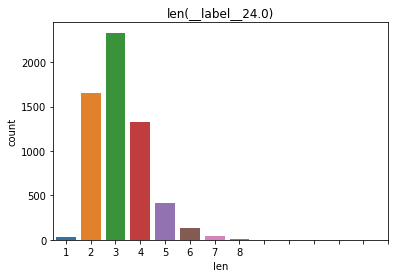

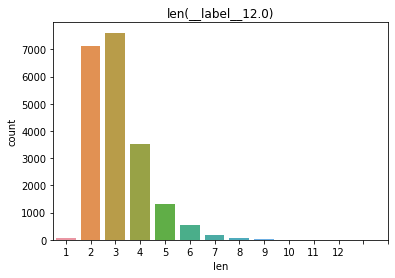

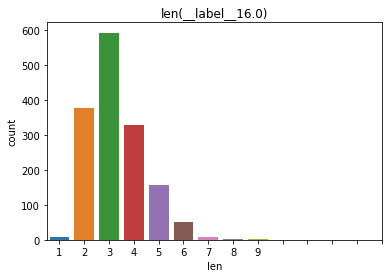

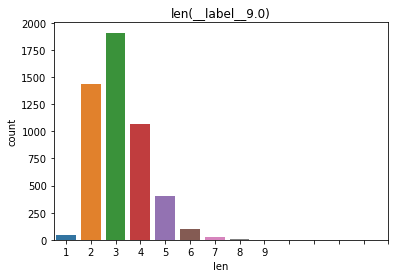

In [209]:
for lb in labels:
    sns.countplot(x='len', data=df_train_preprocessed[df_train_preprocessed.label==lb]).set_title(f'len({lb})')
    plt.xticks(range(14))
    plt.show()

<AxesSubplot:xlabel='label', ylabel='len'>

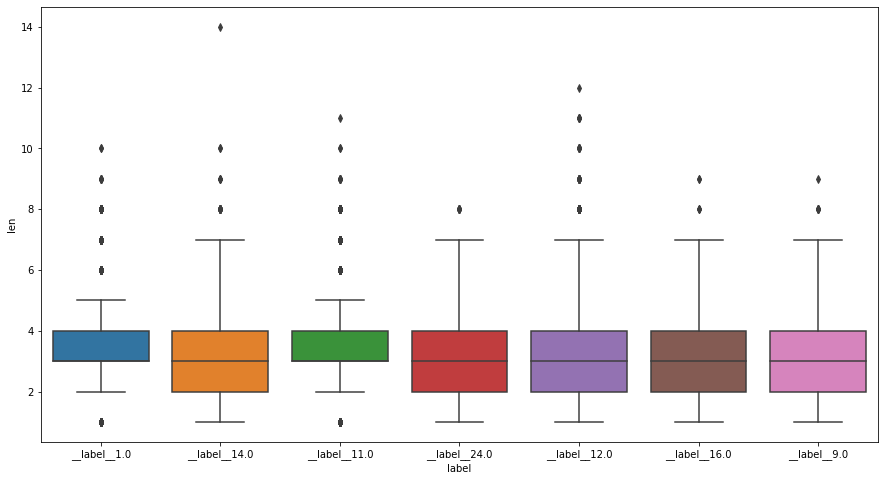

In [210]:
plt.figure(figsize=(15,8))
sns.boxplot(x='label',y='len',data=df_train_preprocessed)

In [211]:
df_train_preprocessed = df_train_preprocessed[(df_train_preprocessed.len>1) & (df_train_preprocessed.len<8)]

In [212]:
df_train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84847 entries, 0 to 91867
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      84847 non-null  object
 1   processed  84847 non-null  object
 2   len        84847 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [213]:
df_train_preprocessed.describe()

len
count  84847.000000
mean       3.211168
std        1.072373
min        2.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000

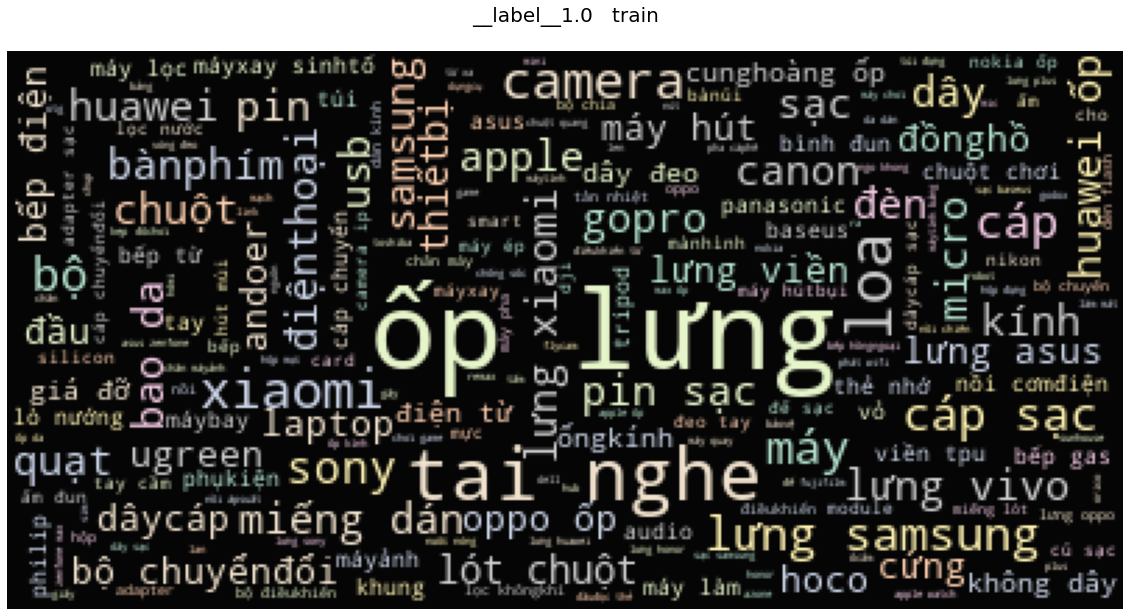

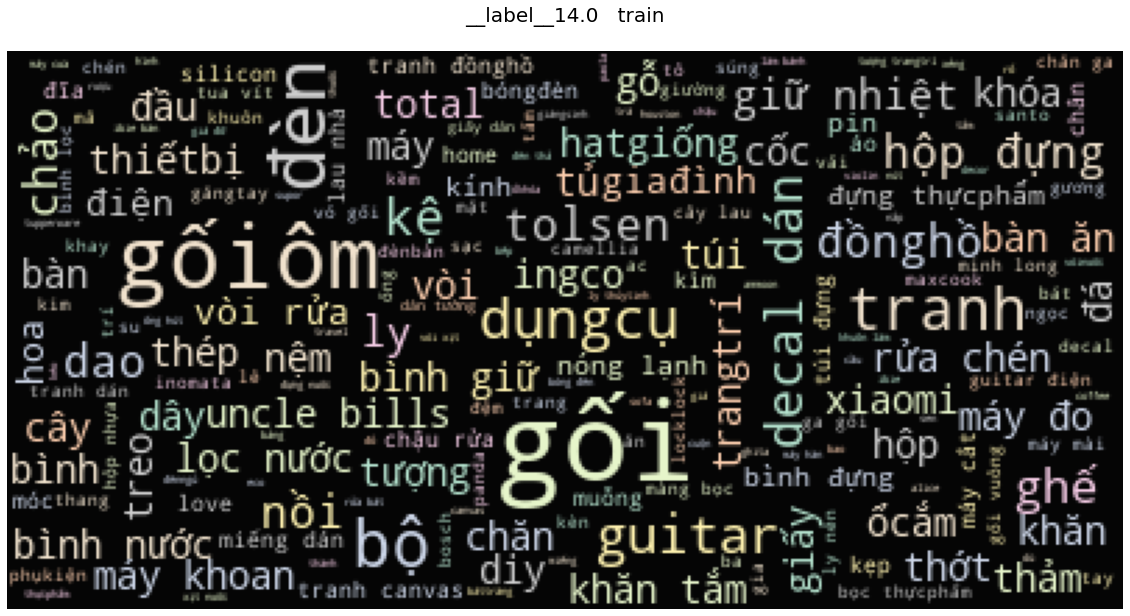

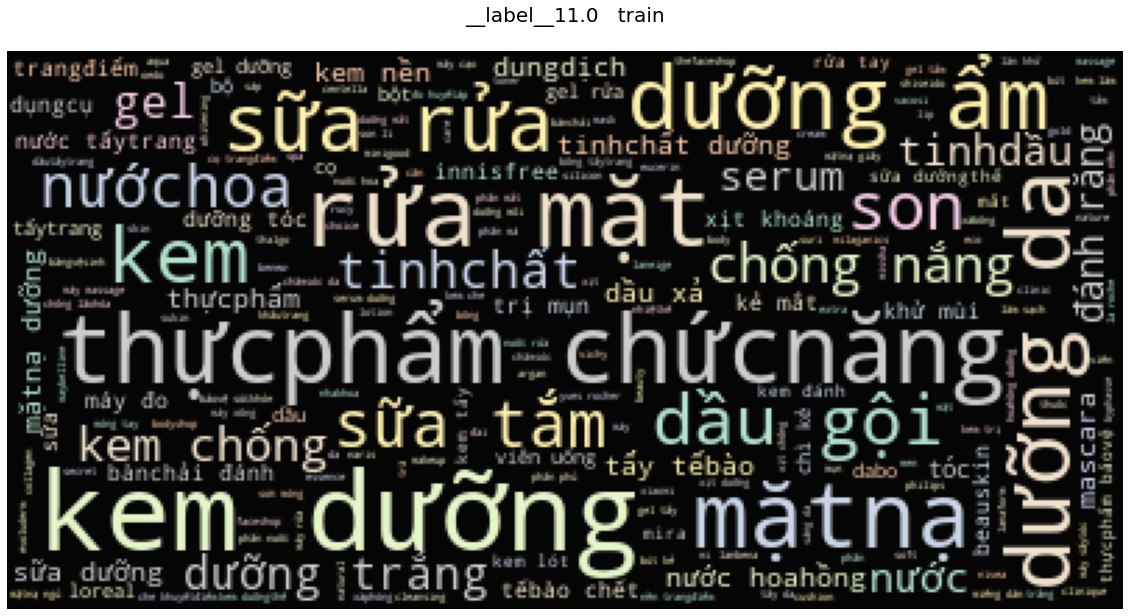

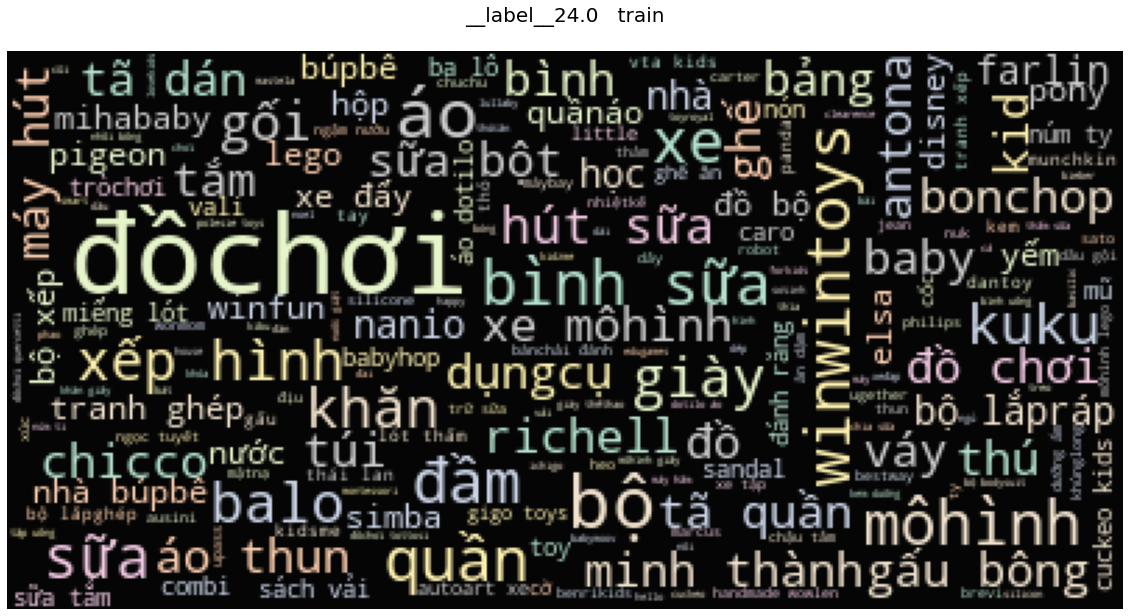

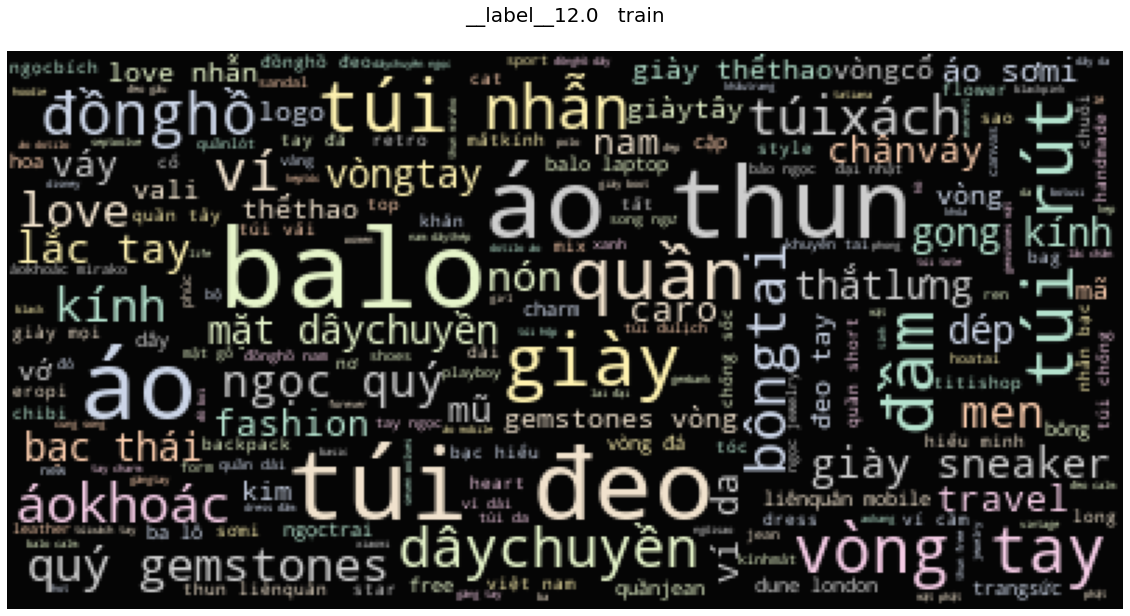

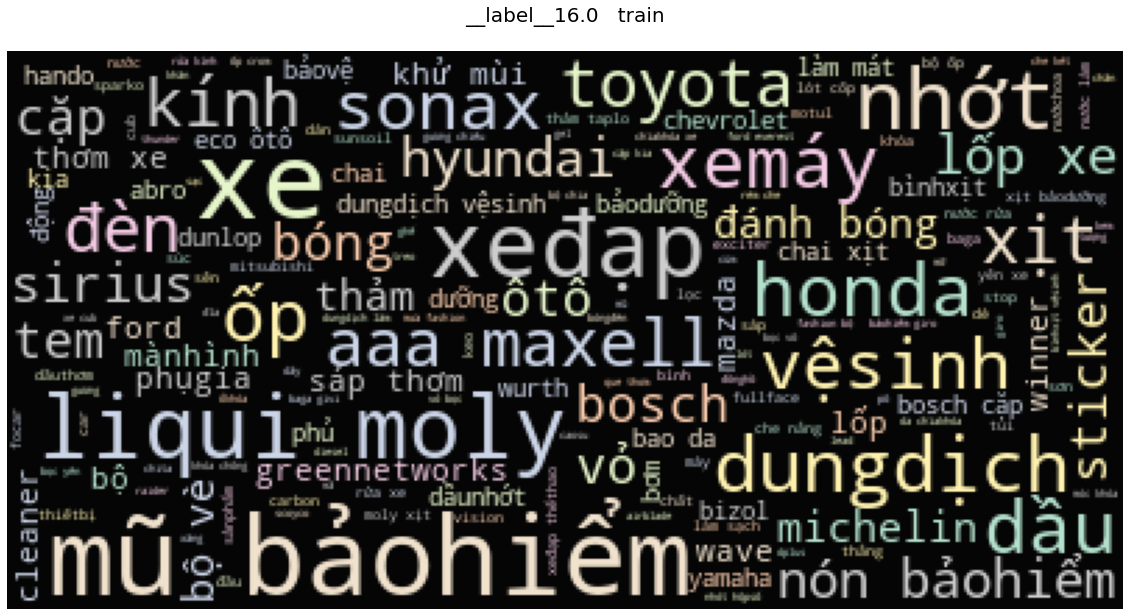

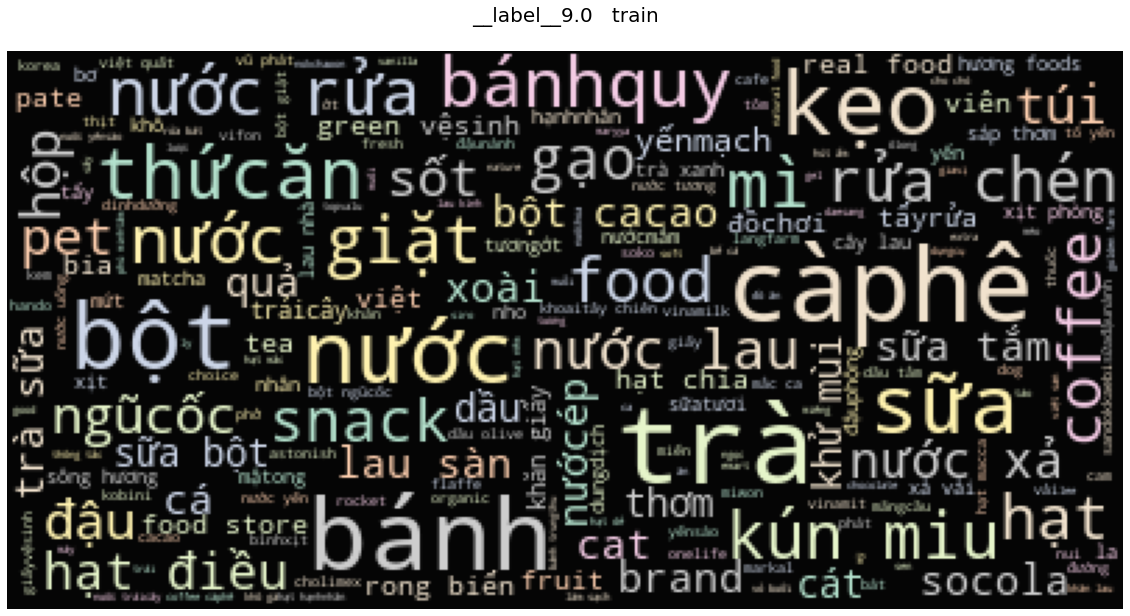

In [214]:
for i in range(len(labels)):
    lb1 = df_train_preprocessed[df_train_preprocessed.label==labels[i]]['processed'].values
    plt.figure(figsize=(20,13))
    wc = WordCloud(background_color="black", max_font_size= 40)
    wc.generate(" ".join(lb1))
    plt.title(labels[i]+'   train\n', fontsize=20)
    plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
    plt.axis('off')

In [215]:
df_train_preprocessed[['label', 'processed']].to_csv('train_preprocessed_v2.csv', index=False)

In [216]:
df_test['processed'] = df_test.title.apply(lambda x: preprocessing(x))
df_test_preprocessed = df_test[['label', 'processed']].drop_duplicates()
df_test_preprocessed['len'] = df_test_preprocessed.processed.apply(lambda x: len(x.split()))
df_test_preprocessed = df_test_preprocessed[(df_test_preprocessed.len>1) & (df_test_preprocessed.len<8)]
df_test_preprocessed.processed = df_test_preprocessed.processed.apply(lambda x: x.replace('_', ''))
drop_dup_and_rm_multi_label_title(df_test_preprocessed)

label                     processed  len
0      __label__12.0             nhẫn bát bạc thái    4
1      __label__12.0         nhẫn bát bạc thái sửu    5
2      __label__12.0             nhẫn kim bạc thái    4
3      __label__12.0                 nhẫn bạc thái    3
4       __label__9.0      bánh xốp fullo pack seru    5
...              ...                           ...  ...
19923  __label__11.0           peripera ink gelato    3
19924  __label__24.0        giường cũi bounce joie    4
19925  __label__24.0                    áo zaclang    2
19926  __label__12.0                giayf datinnos    2
19927  __label__12.0  áo thun giađình smile family    5

[18511 rows x 3 columns]

In [217]:
df_test_preprocessed[['label', 'processed']].to_csv('test_preprocessed_v2.csv', index=False)

In [218]:
df_test_preprocessed.isna().sum()

label        0
processed    0
len          0
dtype: int64

In [220]:
df_test_preprocessed.iloc[463].processed

'gối peanut liêná'